In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list. so that it doesn't generate random numbers every time
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
import requests
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # log the URL, record, set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # add 1 to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | vilhena
Processing Record 3 of Set 1 | terney
Processing Record 4 of Set 1 | sydney mines
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | snezhnogorsk
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | egvekinot
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | ust-kut
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | shache
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | saleilua
City not found. Skipping...
Processing Record 20 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 21 of Set 1 | hermanus
P

Processing Record 38 of Set 4 | yerbogachen
Processing Record 39 of Set 4 | gat
Processing Record 40 of Set 4 | kjollefjord
Processing Record 41 of Set 4 | xixiang
Processing Record 42 of Set 4 | grand-santi
Processing Record 43 of Set 4 | shimoda
Processing Record 44 of Set 4 | great bend
Processing Record 45 of Set 4 | tuatapere
Processing Record 46 of Set 4 | hailey
Processing Record 47 of Set 4 | andenes
Processing Record 48 of Set 4 | tukrah
Processing Record 49 of Set 4 | hit
Processing Record 50 of Set 4 | east london
Processing Record 1 of Set 5 | kysyl-syr
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | the valley
Processing Record 4 of Set 5 | estacion coahuila
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | mahebourg
Processing Record 7 of Set 5 | vaitape
Processing Record 8 of Set 5 | katsuura
Processing Record 9 of Set 5 | santa rosalia
Processing Record 10 of Set 5 | grootfontein
Processing Record 11 of Set 5 | bengkulu
Proces

Processing Record 26 of Set 8 | catuday
Processing Record 27 of Set 8 | tahoua
Processing Record 28 of Set 8 | caravelas
Processing Record 29 of Set 8 | maningrida
Processing Record 30 of Set 8 | okha
Processing Record 31 of Set 8 | mount gambier
Processing Record 32 of Set 8 | hoquiam
Processing Record 33 of Set 8 | alice springs
Processing Record 34 of Set 8 | hamilton
Processing Record 35 of Set 8 | harper
Processing Record 36 of Set 8 | honningsvag
Processing Record 37 of Set 8 | requena
Processing Record 38 of Set 8 | puerto leguizamo
Processing Record 39 of Set 8 | quelimane
Processing Record 40 of Set 8 | puerto ayacucho
Processing Record 41 of Set 8 | cockburn town
Processing Record 42 of Set 8 | tupik
Processing Record 43 of Set 8 | coahuayana
Processing Record 44 of Set 8 | los chiles
Processing Record 45 of Set 8 | ahipara
Processing Record 46 of Set 8 | shirvan
Processing Record 47 of Set 8 | fianga
City not found. Skipping...
Processing Record 48 of Set 8 | bilibino
Proces

Processing Record 12 of Set 12 | la rioja
Processing Record 13 of Set 12 | korla
Processing Record 14 of Set 12 | moyale
Processing Record 15 of Set 12 | arvika
Processing Record 16 of Set 12 | vigia del fuerte
Processing Record 17 of Set 12 | north branch
Processing Record 18 of Set 12 | tessalit
Processing Record 19 of Set 12 | dunedin
Processing Record 20 of Set 12 | yantal
Processing Record 21 of Set 12 | nador
Processing Record 22 of Set 12 | araguatins
City not found. Skipping...
Processing Record 23 of Set 12 | borger
Processing Record 24 of Set 12 | husavik
Processing Record 25 of Set 12 | magadan
Processing Record 26 of Set 12 | mana
Processing Record 27 of Set 12 | maarianhamina
Processing Record 28 of Set 12 | kaduna
Processing Record 29 of Set 12 | bitung
Processing Record 30 of Set 12 | rosita
Processing Record 31 of Set 12 | ambilobe
Processing Record 32 of Set 12 | hanna
Processing Record 33 of Set 12 | guadalupe y calvo
Processing Record 34 of Set 12 | cap-chat
Processi

In [10]:
len(city_data)

571

In [11]:
# convert the array of dictionaries to a Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,62.60,48,40,29.93,CL,2021-03-08 20:22:12
1,Vilhena,-12.7406,-60.1458,71.60,100,75,9.22,BR,2021-03-08 20:25:30
2,Terney,45.0503,136.6092,23.13,88,29,5.91,RU,2021-03-08 20:25:30
3,Sydney Mines,46.2367,-60.2177,28.99,74,75,9.22,CA,2021-03-08 20:25:31
4,Albany,42.6001,-73.9662,39.00,25,71,5.93,US,2021-03-08 20:24:15
5,Snezhnogorsk,69.1933,33.2531,-18.40,83,0,2.24,RU,2021-03-08 20:25:32
6,San Patricio,28.0170,-97.5169,73.40,56,75,17.27,US,2021-03-08 20:25:33
7,Rikitea,-23.1203,-134.9692,80.83,81,51,12.41,PF,2021-03-08 20:24:38
8,Cidreira,-30.1811,-50.2056,78.12,69,2,7.09,BR,2021-03-08 20:25:34
9,Egvekinot,66.3167,-179.1667,-14.75,93,100,3.62,RU,2021-03-08 20:25:34


In [12]:
# reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-03-08 20:22:12,-53.1500,-70.9167,62.60,48,40,29.93
1,Vilhena,BR,2021-03-08 20:25:30,-12.7406,-60.1458,71.60,100,75,9.22
2,Terney,RU,2021-03-08 20:25:30,45.0503,136.6092,23.13,88,29,5.91
3,Sydney Mines,CA,2021-03-08 20:25:31,46.2367,-60.2177,28.99,74,75,9.22
4,Albany,US,2021-03-08 20:24:15,42.6001,-73.9662,39.00,25,71,5.93
...,...,...,...,...,...,...,...,...,...
566,Portland,US,2021-03-08 20:28:54,45.5234,-122.6762,52.00,53,75,13.80
567,Broome,US,2021-03-08 20:29:15,42.2506,-75.8330,37.99,40,90,6.91
568,Camopi,GF,2021-03-08 20:29:15,3.1655,-52.3158,80.13,86,95,5.26
569,Santiago De Las Vegas,CU,2021-03-08 20:29:16,22.9700,-82.3869,75.20,43,40,19.57


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

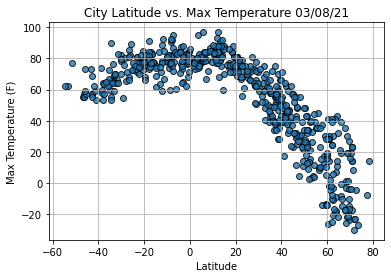

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

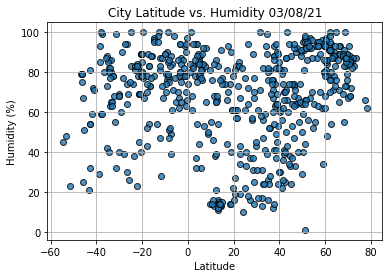

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

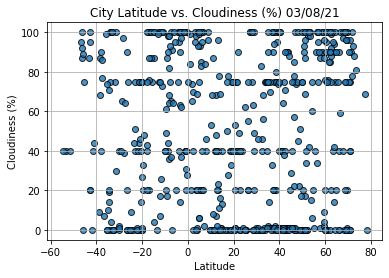

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

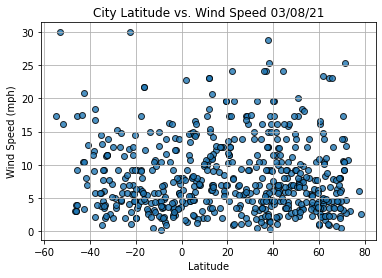

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                       Shache
Country                        CN
Date          2021-03-08 20:25:36
Lat                       38.4167
Lng                       77.2406
Max Temp                    47.16
Humidity                       49
Cloudiness                     80
Wind Speed                   1.59
Name: 13, dtype: object

In [25]:
# create northern and southern hemisphere data frames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [32]:
# Import linregress
from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.title(title)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

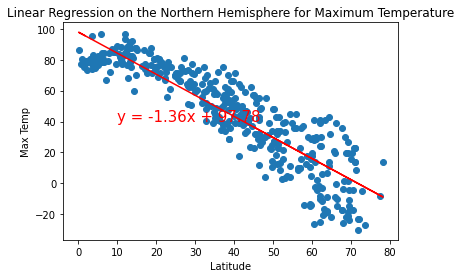

In [38]:
# linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))

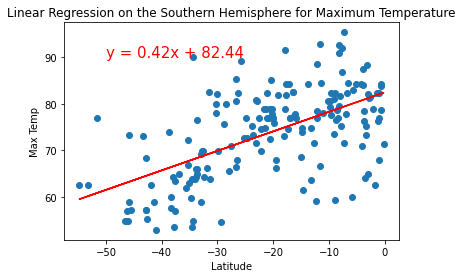

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


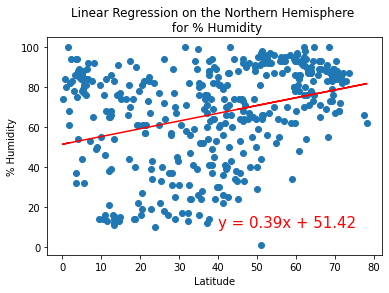

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


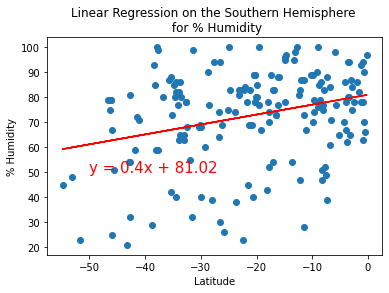

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-50,50))


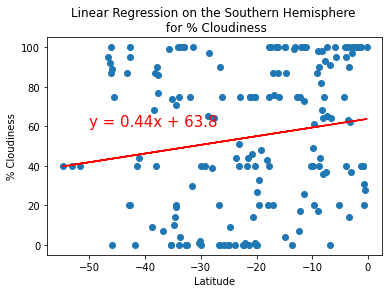

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,60))


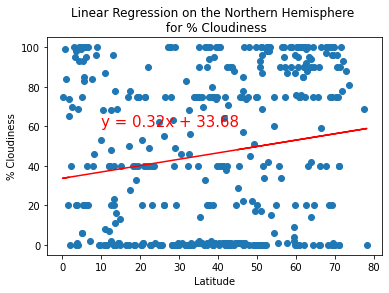

In [54]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (10,60))


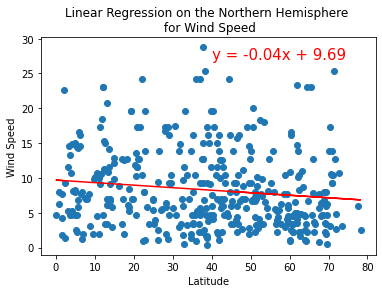

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,27))


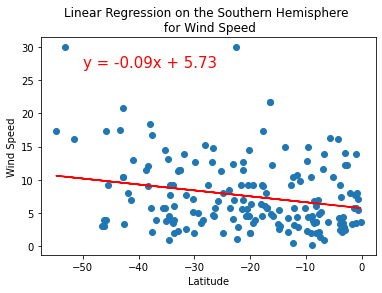

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,27))